In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

## Research Question:

What type of customer leads to the highest overall order values?

## Data Collection:

In [2]:
orders_df = pd.read_csv('orders.csv')
restaurant_df = pd.read_csv('restaurant.csv')
users_df = pd.read_csv('users.csv')

## Data Descriptions:

For this phase we collected 3 different data tables from kaggle. All of the data tables pertain to different types of data on the Zomato Food Delivery platform, a platform used in India. The first of the data tables, the orders data table includes information on specific orders that occured on the zomato platform. Each order entry has a date, sales quantity, sales amount, currency of order, the user id associated with the order, and the restaurant id associated with the order. The next table was the restaurant table. Each entry in this table has an id identifying the restaurant, the name of the restaurant, the city of the restaurant, the restaurant's rating, the number of ratings the restaurant has, the estimated cost per person for that restaurant, the cuisine, the license number, the restaurant's link, the address, and a json link to the menu. Finally the third table we used was the users_df table. Each entry in this field has a user_id, a name of the user, an email, a password, the gender the marital status, occupation, income, educational qualifications, and family size (including the customer). 

Source For orders.csv:
https://www.kaggle.com/datasets/anas123siddiqui/zomato-database?select=orders.csv

Source For restaurant.csv:
https://www.kaggle.com/datasets/anas123siddiqui/zomato-database?select=restaurant.csv

Source For users.csv:
https://www.kaggle.com/datasets/anas123siddiqui/zomato-database?select=users.csv

## Data Cleaning:

### Join Restaurants, Users, and Orders Dataframes:

In [3]:
orders_df = orders_df.dropna(subset=['r_id'])
orders_df['r_id'] = orders_df['r_id'].astype(int)

In [4]:
merged_df = pd.merge(orders_df, users_df, on='user_id', how='inner')

In [5]:
final_merged_df = pd.merge(merged_df, restaurant_df, left_on='r_id', right_on='id', how='inner')

In [6]:
pd.set_option('display.max_columns', None)
final_merged_df.head()

,Unnamed: 0_x,order_date,sales_qty,sales_amount,currency,user_id,r_id,Unnamed: 0_y,name_x,email,password,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Unnamed: 0,id,name_y,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,0,2017-10-10,100,41241,INR,49226,567335,49225,Teresa Garcia,crobertson@example.com,o(7&&U7uGJ,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6,0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,100584,2019-03-07,1,130,INR\r,49226,555824,49225,Teresa Garcia,crobertson@example.com,o(7&&U7uGJ,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6,100584,555824,Masala Kechup Amar's Kitchen,"Aminabad,Lucknow",--,Too Few Ratings,₹ 250,"American,Fast Food",22722738000007,https://www.swiggy.com/restaurants/masala-kech...,"Masala Kechup Amar's Kitchen, 279/35, Pandarib...",Menu/555824.json
2,1,2018-05-08,3,-1,INR,77359,531342,77358,Dana Reeves,tonidecker@example.net,V#$14TJu)h,23,Male,Single,Student,More than 50000,Post Graduate,3,1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
3,112496,2020-06-08,1,236,INR\r,77359,349813,77358,Dana Reeves,tonidecker@example.net,V#$14TJu)h,23,Male,Single,Student,More than 50000,Post Graduate,3,112496,349813,Henschel Ghar,Nagaon,--,Too Few Ratings,₹ 200,"Chinese,Bengali",license,https://www.swiggy.com/restaurants/henschel-gh...,"Henschel Ghar, Henschel Ghar. M G Road. Near K...",Menu/349813.json
4,113376,2018-03-20,1,56,INR\r,77359,510814,77358,Dana Reeves,tonidecker@example.net,V#$14TJu)h,23,Male,Single,Student,More than 50000,Post Graduate,3,113376,510814,Box 5 Cafe,"Nandanvan,Nagpur",--,Too Few Ratings,₹ 150,"American,Chinese",21522262000170,https://www.swiggy.com/restaurants/box-5-cafe-...,"Box 5 Cafe, NEAR NEW ERA HOSPITAL , Zone No.8-...",Menu/510814.json


##### Data Cleaning / Merge Steps Taken:
- Dropped the entries with an na r_id
- Merged the three tables using inner joins
- Because orders contained the restaurant and customer id's, I used that as the central dataframe on which the other two were joined onto


### Renaming Fields:

In [7]:
final_merged_df = final_merged_df.rename(columns = {'Unnamed: 0_x':'order_id', 'sales_qty':'number_items_ordered', 'sales_amount':'total_order_cost', 'user_id':'c_id', 'r_id':'r_id', 'name_x':'c_name', 'Age':'c_age', 'Gender':'c_gender', 'Age':'c_age', 'Gender':'c_gender','Marital Status':'c_marital_status','Occupation':'c_occupation','Monthly Income':'c_monthly_income','Educational Qualifications':'c_education_level','Family size':'c_family_size', 'name_y':'r_name', 'city': 'r_city', 'rating':'r_rating', 'rating_count':'r_number_of_ratings', 'cost':'r_average_per_head_cost','cuisine':'r_cuisine'
})

###### Renaming Explanation:
- Renamed following fields:
    - 'Unnamed: 0_x'
    - 'sales_qty'
    - 'sales_amount'
    - 'user_id'
    - 'r_id'
    - 'name_x'
    - 'Age'
    - 'Gender'
    - 'Age'
    - 'Gender'
    - 'Marital Status'
    - 'Occupation'
    - 'Monthly Income'
    - 'Educational Qualifications'
    - 'Family size'
    - 'name_y'
    - 'city'
    - 'rating'
    - 'rating_count'
    - 'cost'
    - 'cuisine'
- Reasoning: Field names are somewhat vague and renaming could add clarity to what the data in the column represents

### Dropping Fields:

In [8]:
final_merged_df = final_merged_df.drop(columns=['Unnamed: 0_y','email','password','Unnamed: 0','id','lic_no','link','address','menu','r_cuisine'])

In [9]:
pd.set_option('display.max_columns', None)
final_merged_df.head()

,order_id,order_date,number_items_ordered,total_order_cost,currency,c_id,r_id,c_name,c_age,c_gender,c_marital_status,c_occupation,c_monthly_income,c_education_level,c_family_size,r_name,r_city,r_rating,r_number_of_ratings,r_average_per_head_cost
0,0,2017-10-10,100,41241,INR,49226,567335,Teresa Garcia,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200
1,100584,2019-03-07,1,130,INR\r,49226,555824,Teresa Garcia,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6,Masala Kechup Amar's Kitchen,"Aminabad,Lucknow",--,Too Few Ratings,₹ 250
2,1,2018-05-08,3,-1,INR,77359,531342,Dana Reeves,23,Male,Single,Student,More than 50000,Post Graduate,3,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200
3,112496,2020-06-08,1,236,INR\r,77359,349813,Dana Reeves,23,Male,Single,Student,More than 50000,Post Graduate,3,Henschel Ghar,Nagaon,--,Too Few Ratings,₹ 200
4,113376,2018-03-20,1,56,INR\r,77359,510814,Dana Reeves,23,Male,Single,Student,More than 50000,Post Graduate,3,Box 5 Cafe,"Nandanvan,Nagpur",--,Too Few Ratings,₹ 150


In [10]:
final_merged_df.to_csv('final_merged.csv')

##### Dropping Fields:
- Dropped:
    - 'Unnamed: 0_y'
    - 'email'
    - 'password'
    - 'Unnamed: 0'
    - 'id'
    - 'lic_no'
    - 'link'
    - 'address'
    - 'menu'
    - 'cuisine'
- Reasoning: These columns represent personal data, useless index data, or other data that is niche and would not contribute the to total sales amount in all likelihood


### Cleaning Determination - order_id:

In [11]:
final_merged_df[final_merged_df['order_id'].value_counts()!=1]

/var/folders/h7/q8xjrt310cz6vyr6k80y1h_80000gn/T/ipykernel_90054/1493102469.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_merged_df[final_merged_df['order_id'].value_counts()!=1]


,order_id,order_date,number_items_ordered,total_order_cost,currency,c_id,r_id,c_name,c_age,c_gender,c_marital_status,c_occupation,c_monthly_income,c_education_level,c_family_size,r_name,r_city,r_rating,r_number_of_ratings,r_average_per_head_cost


##### Cleaning Notes:
- Field does not near to be cleaned because every user id is unique
    - This is evident from the fact that there are no value counts other than 1 returned in the above dataframe

### Cleaning Determination - order_date:

In [12]:
null_dates = final_merged_df['order_date'].isna().sum()
print(f'Number of null dates: {null_dates}')

Number of null dates: 0


In [13]:
final_merged_df['order_date'] = pd.to_datetime(final_merged_df['order_date'])

##### Cleaning Notes:
- Don't need to clean anything because there are no null dates
- Change default date format to datetime format

### Cleaning Determination - number_items_ordered:

In [14]:
null_items = final_merged_df['number_items_ordered'].isna().sum()
print(f'Number of null items ordered: {null_items}')

Number of null items ordered: 0


##### Cleaning Notes:
- Field does not near to be cleaned because no null items

### Cleaning Determination - total_order_cost:

In [15]:
subset = final_merged_df['total_order_cost']<1

In [16]:
final_merged_df = final_merged_df[~subset]

##### Cleaning Notes:
- We dropped all orders that had a total order cost of less than 1 rupee
- While in theory there are reasons for why an order could be less than 1 rupee, we don't have data like discounts and vouchers that would allow us to justify that rupee total, so it makes sense to drop that entry altogether

### Cleaning Determination - currency:

In [17]:
final_merged_df['currency'].value_counts()

INR\r    146786
INR         275
USD           2
Name: currency, dtype: int64

In [18]:
final_merged_df.loc[(final_merged_df.currency == 'INR\r'),'currency']='INR'
final_merged_df = final_merged_df[final_merged_df.currency != 'USD']

##### Cleaning Notes:
- Converted all currency entries of INR\r to just INR for continuity. According to the documentation they mean the same exact thing
- Dropped the two values that were represented in USD

### Cleaning Determination - c_id:

In [19]:
yo = final_merged_df['c_id'].isna().sum()
print(f'Number of null customer ids: {yo}')

Number of null customer ids: 0


##### Cleaning Notes:
- Don't need to clean anything here because there are no NAs. It is ok for a customer id to appear multiple times as a customer may order multiple times from the same or different restaurants

### Cleaning Determination - r_id:

In [20]:
yo2 = final_merged_df['r_id'].isna().sum()
print(f'Number of null restaurant ids: {yo2}')

Number of null restaurant ids: 0


##### Cleaning Notes:
- Don't need to clean anything here becuase there are no NAs 
- It is ok for a restaurant id to appear multiple times as restaurants can accept multiple orders

### Cleaning Determination - c_name:

In [21]:
nulls = final_merged_df['c_name'].isna().sum()
print(f'Number of null values: {nulls}')

Number of null values: 0


In [22]:
e_strings = (final_merged_df['c_name'] == '').sum()
print(f'Number of empty strings: {e_strings}')

Number of empty strings: 0


In [23]:
spaces = final_merged_df[final_merged_df['c_name'].str.strip() == ''].shape[0]
print(f'Number of strings with undesirable spaces: {spaces}')

Number of strings with undesirable spaces: 0


##### Cleaning Notes:
- Don't need to clean anything here as no empty strings, no nulls, and no undersirable spaces

### Cleaning Determination - c_age:

In [24]:
nulls = final_merged_df['c_age'].isna().sum()
print(f'Number of null values: {nulls}')

Number of null values: 0


##### Cleaning Notes:
- Don't need to clean anything here as there are no nulls and the ages seem completely normal and non-repetitive

### Cleaning Determination - c_gender:

In [25]:
final_merged_df['c_gender'].value_counts()

Male      84098
Female    62963
Name: c_gender, dtype: int64

##### Cleaning Notes:
- Don't need to clean anything here as all of the datapoints fall into the male or female category. No entries fall into any other category
- Could be reflective of already cleaned data, or reflective of the nature of the society from which the data was collected

### Cleaning Determination - c_marital_status:

In [26]:
final_merged_df['c_marital_status'].value_counts()

Single               101322
Married               41118
Prefer not to say      4621
Name: c_marital_status, dtype: int64

##### Cleaning Notes:
- Don't need to clean anything here as all of the datapoints fall into the Single, Married, and Prefer not to say categories

### Cleaning Determination - c_occupation:

In [27]:
nulls = final_merged_df['c_occupation'].isna().sum()
print(f'Number of null strings: {nulls}')

Number of null strings: 0


In [28]:
final_merged_df['c_occupation'].value_counts()

Student           78301
Employee          44830
Self Employeed    20541
House wife         3389
Name: c_occupation, dtype: int64

##### Cleaning Notes:
- Don't need to clean anything here because all datapoints fall into Student, Employee, Self Employed, or House Wife categories

### Cleaning Determination - c_monthly_income:

In [29]:
final_merged_df['c_monthly_income'].value_counts()

No Income          70833
25001 to 50000     26140
More than 50000    23687
10001 to 25000     16910
Below Rs.10000      9491
Name: c_monthly_income, dtype: int64

In [30]:
# final_merged_df.loc[(final_merged_df.c_monthly_income == 'No Income'),'c_monthly_income']=0
# final_merged_df.loc[(final_merged_df.c_monthly_income == 'Below Rs.10000'),'c_monthly_income']=1
# final_merged_df.loc[(final_merged_df.c_monthly_income == '10001 to 25000'),'c_monthly_income']=2
# final_merged_df.loc[(final_merged_df.c_monthly_income == '25001 to 50000'),'c_monthly_income']=3
# final_merged_df.loc[(final_merged_df.c_monthly_income == 'More than 50000'),'c_monthly_income']=4

##### Cleaning Notes:
- Encoded the income ranges into values 0-4
- 0 being the lowest income level
- 4 being the highest income level
- Will allow for potential data analysis

### Cleaning Determination - c_education_level:

In [31]:
nulls = final_merged_df['c_education_level'].isna().sum()
print(f'Number of null values: {nulls}')

Number of null values: 0


In [32]:
final_merged_df['c_education_level'].value_counts()

Graduate         67272
Post Graduate    65607
Ph.D              8827
School            4602
Uneducated         753
Name: c_education_level, dtype: int64

##### Cleaning Notes:
- Don't need to clean anything here because no null values
- Every education level falls into 5 categories

### Cleaning Determination - c_family_size:

In [33]:
nulls = final_merged_df['c_family_size'].isna().sum()
print(f'Number of nulls: {nulls}')

Number of nulls: 0


In [34]:
final_merged_df['c_family_size'].value_counts()

3    44199
2    38365
4    23802
5    20462
6    11087
1     9146
Name: c_family_size, dtype: int64

##### Cleaning Notes:
- Don't need to clean anything here because no null values
- No weird outlier values

### Cleaning Determination - r_name:

In [35]:
nulls = final_merged_df['r_name'].isna().sum()
print(f'Number of null strings: {nulls}')

Number of null strings: 84


In [36]:
e_strings = (final_merged_df['r_name'] == '').sum()
print(f'Number of empty strings: {e_strings}')

Number of empty strings: 0


In [37]:
spaces = final_merged_df[final_merged_df['r_name'].str.strip() == ''].shape[0]
print(f'Number of strings with undesirable spaces: {spaces}')

Number of strings with undesirable spaces: 0


In [38]:
final_merged_df = final_merged_df[final_merged_df['r_name'].notna()]
nulls = final_merged_df['r_name'].isna().sum()

##### Cleaning Notes:
- Filtered out nulls (we can't really work with restaurant orders if we don't have the names of the restaurants)
- No empty strings
- No undesirable spaces

### Cleaning Determination - r_city:

In [39]:
final_merged_df['r_city'] = final_merged_df['r_city'].str.split(",").str[-1].str.strip()

In [40]:
nulls = final_merged_df['r_city'].isna().sum()
print(f'Number of null strings: {nulls}')

Number of null strings: 0


##### Cleaning Notes:
- All city entries were generalized. i.e. if the neighborhood and city was included in neighborhood, city format, we only included city
- No NA values

### Cleaning Determination - r_rating:

In [41]:
final_merged_df['r_rating'].value_counts().head()

--     86105
4.0     6486
4.1     6244
4.2     5764
3.8     5663
Name: r_rating, dtype: int64

##### Cleaning Notes:
- Some restaurants don't have a rating, so they have "--" as the entry
- Will not change at this point

### Cleaning Determination - r_number_of_ratings:

In [42]:
final_merged_df['r_number_of_ratings'].value_counts()

Too Few Ratings    86105
20+ ratings        21443
100+ ratings       20356
50+ ratings        11898
500+ ratings        4360
1K+ ratings         2703
5K+ ratings           97
10K+ ratings          15
Name: r_number_of_ratings, dtype: int64

In [43]:
# final_merged_df.loc[(final_merged_df.r_number_of_ratings == 'Too Few Ratings'),'r_number_of_ratings']=0
# final_merged_df.loc[(final_merged_df.r_number_of_ratings == '1K+ ratings'),'r_number_of_ratings']=1
# final_merged_df.loc[(final_merged_df.r_number_of_ratings == '5K+ ratings'),'r_number_of_ratings']=2
# final_merged_df.loc[(final_merged_df.r_number_of_ratings == '10K+ ratings'),'r_number_of_ratings']=3
# final_merged_df.loc[(final_merged_df.r_number_of_ratings == '20+ ratings'),'r_number_of_ratings']=4
# final_merged_df.loc[(final_merged_df.r_number_of_ratings == '50+ ratings'),'r_number_of_ratings']=5
# final_merged_df.loc[(final_merged_df.r_number_of_ratings == '100+ ratings'),'r_number_of_ratings']=6
# final_merged_df.loc[(final_merged_df.r_number_of_ratings == '500+ ratings'),'r_number_of_ratings']=7

##### Cleaning Notes:
- Encoded the ratings bracket to a value from 0-7
- Will allow for easier analysis later on

### Cleaning Determination - r_average_per_head_cost:

In [44]:
final_merged_df['r_average_per_head_cost'].value_counts()

₹ 200    38273
₹ 300    29362
₹ 250    19542
₹ 150    11972
₹ 400    11600
         ...  
₹ 283        1
₹ 746        1
₹ 287        1
₹ 254        1
₹ 312        1
Name: r_average_per_head_cost, Length: 362, dtype: int64

In [45]:
nulls = final_merged_df['r_average_per_head_cost'].isna().sum()
print(f'Number of null strings: {nulls}')

Number of null strings: 43


In [46]:
final_merged_df = final_merged_df[final_merged_df['r_average_per_head_cost'].notna()]
nulls = final_merged_df['r_average_per_head_cost'].isna().sum()
print(f'Number of null strings: {nulls}')

Number of null strings: 0


In [47]:
final_merged_df[~final_merged_df['r_average_per_head_cost'].str.contains('₹')]

,order_id,order_date,number_items_ordered,total_order_cost,currency,c_id,r_id,c_name,c_age,c_gender,c_marital_status,c_occupation,c_monthly_income,c_education_level,c_family_size,r_name,r_city,r_rating,r_number_of_ratings,r_average_per_head_cost


In [48]:
final_merged_df['r_average_per_head_cost'] = final_merged_df['r_average_per_head_cost'].str.replace('₹', '').str.strip()
final_merged_df['r_average_per_head_cost'] = final_merged_df['r_average_per_head_cost'].astype(int)

##### Cleaning Notes:
- filter out null strings
- remove rupee symbol r_average_per_head_cost and have the value just saved as an integer

### Cleaning Determination - r_cuisine:

In [49]:
# nulls = final_merged_df['r_cuisine'].isna().sum()
# print(f'Number of null strings: {nulls}')

In [50]:
# final_merged_df = final_merged_df[final_merged_df['r_cuisine'].notna()]
# nulls = final_merged_df['r_cuisine'].isna().sum()
# print(f'Number of null strings: {nulls}')

##### Cleaning Notes:
- Filtered Out The Null Strings

## Cleaned Dataframe

In [51]:
final_merged_df.head()
# final_merged_df.to_csv('final.csv')

,order_id,order_date,number_items_ordered,total_order_cost,currency,c_id,r_id,c_name,c_age,c_gender,c_marital_status,c_occupation,c_monthly_income,c_education_level,c_family_size,r_name,r_city,r_rating,r_number_of_ratings,r_average_per_head_cost
0,0,2017-10-10,100,41241,INR,49226,567335,Teresa Garcia,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6,AB FOODS POINT,Abohar,--,Too Few Ratings,200
1,100584,2019-03-07,1,130,INR,49226,555824,Teresa Garcia,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6,Masala Kechup Amar's Kitchen,Lucknow,--,Too Few Ratings,250
3,112496,2020-06-08,1,236,INR,77359,349813,Dana Reeves,23,Male,Single,Student,More than 50000,Post Graduate,3,Henschel Ghar,Nagaon,--,Too Few Ratings,200
4,113376,2018-03-20,1,56,INR,77359,510814,Dana Reeves,23,Male,Single,Student,More than 50000,Post Graduate,3,Box 5 Cafe,Nagpur,--,Too Few Ratings,150
5,2,2018-04-06,1,875,INR,5321,158203,Donald Anderson,24,Male,Married,Employee,More than 50000,Post Graduate,3,theka coffee desi,Abohar,3.8,100+ ratings,100


In [52]:
# final_merged_df.dtypes

### extra steps
2. c_gender => binary encoding
- 1 => male
- 0 => female
3. c_marital_status => one hot encode
4. c_occupation => one hot encode
5. c_monthly_income => provide bounded value assignment, cast to int64
6. c_education_level => one hot encode
7. r_rating => to float
8. r_number_of_ratings => lower bound value assignment, cast to int64

In [53]:
# X = pd.get_dummies(final_merged_df, columns=['c_marital_status', 'c_occupation', 'c_monthly_income', 'c_education_level', 'r_number_of_ratings'])
# X

In [54]:
final_merged_df['c_gender'] = final_merged_df['c_gender'].replace({"Male": 1, "Female": 0})
final_merged_df
# final_merged_df[final_merged_df['c_gender']=='Female'] = 0
# final_merged_df

,order_id,order_date,number_items_ordered,total_order_cost,currency,c_id,r_id,c_name,c_age,c_gender,c_marital_status,c_occupation,c_monthly_income,c_education_level,c_family_size,r_name,r_city,r_rating,r_number_of_ratings,r_average_per_head_cost
0,0,2017-10-10,100,41241,INR,49226,567335,Teresa Garcia,27,1,Married,Self Employeed,25001 to 50000,Graduate,6,AB FOODS POINT,Abohar,--,Too Few Ratings,200
1,100584,2019-03-07,1,130,INR,49226,555824,Teresa Garcia,27,1,Married,Self Employeed,25001 to 50000,Graduate,6,Masala Kechup Amar's Kitchen,Lucknow,--,Too Few Ratings,250
3,112496,2020-06-08,1,236,INR,77359,349813,Dana Reeves,23,1,Single,Student,More than 50000,Post Graduate,3,Henschel Ghar,Nagaon,--,Too Few Ratings,200
4,113376,2018-03-20,1,56,INR,77359,510814,Dana Reeves,23,1,Single,Student,More than 50000,Post Graduate,3,Box 5 Cafe,Nagpur,--,Too Few Ratings,150
5,2,2018-04-06,1,875,INR,5321,158203,Donald Anderson,24,1,Married,Employee,More than 50000,Post Graduate,3,theka coffee desi,Abohar,3.8,100+ ratings,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148659,148513,2019-01-11,1,1625,INR,9221,197786,Joy Smith,24,1,Single,Student,No Income,Post Graduate,3,Cake Pastry and Cafe,Yavatmal,--,Too Few Ratings,200
148660,148522,2019-01-16,2,3606,INR,66229,211591,Felicia Walls,22,1,Single,Student,25001 to 50000,Graduate,3,Cafe Chocolicious,Yavatmal,--,Too Few Ratings,200
148661,148525,2019-01-17,1,1523,INR,53604,242762,Aaron Mccarthy,25,1,Single,Student,No Income,Post Graduate,4,Frost and Feather,Yavatmal,--,Too Few Ratings,250
148662,148537,2019-01-23,1,1477,INR,3414,562647,Mr. Reginald Chen,23,1,Single,Student,Below Rs.10000,Post Graduate,2,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,300


In [55]:
final_merged_df = pd.get_dummies(final_merged_df, columns=['c_marital_status', 'c_occupation', 'c_education_level'])

In [56]:
final_merged_df.head()

,order_id,order_date,number_items_ordered,total_order_cost,currency,c_id,r_id,c_name,c_age,c_gender,c_monthly_income,c_family_size,r_name,r_city,r_rating,r_number_of_ratings,r_average_per_head_cost,c_marital_status_Married,c_marital_status_Prefer not to say,c_marital_status_Single,c_occupation_Employee,c_occupation_House wife,c_occupation_Self Employeed,c_occupation_Student,c_education_level_Graduate,c_education_level_Ph.D,c_education_level_Post Graduate,c_education_level_School,c_education_level_Uneducated
0,0,2017-10-10,100,41241,INR,49226,567335,Teresa Garcia,27,1,25001 to 50000,6,AB FOODS POINT,Abohar,--,Too Few Ratings,200,1,0,0,0,0,1,0,1,0,0,0,0
1,100584,2019-03-07,1,130,INR,49226,555824,Teresa Garcia,27,1,25001 to 50000,6,Masala Kechup Amar's Kitchen,Lucknow,--,Too Few Ratings,250,1,0,0,0,0,1,0,1,0,0,0,0
3,112496,2020-06-08,1,236,INR,77359,349813,Dana Reeves,23,1,More than 50000,3,Henschel Ghar,Nagaon,--,Too Few Ratings,200,0,0,1,0,0,0,1,0,0,1,0,0
4,113376,2018-03-20,1,56,INR,77359,510814,Dana Reeves,23,1,More than 50000,3,Box 5 Cafe,Nagpur,--,Too Few Ratings,150,0,0,1,0,0,0,1,0,0,1,0,0
5,2,2018-04-06,1,875,INR,5321,158203,Donald Anderson,24,1,More than 50000,3,theka coffee desi,Abohar,3.8,100+ ratings,100,1,0,0,1,0,0,0,0,0,1,0,0


In [57]:
final_merged_df['c_monthly_income'].value_counts()

No Income          70774
25001 to 50000     26116
More than 50000    23666
10001 to 25000     16894
Below Rs.10000      9484
Name: c_monthly_income, dtype: int64

In [58]:
final_merged_df = final_merged_df[final_merged_df['r_rating'] != '--']
final_merged_df['r_rating'] = pd.to_numeric(final_merged_df['r_rating'])
final_merged_df

,order_id,order_date,number_items_ordered,total_order_cost,currency,c_id,r_id,c_name,c_age,c_gender,c_monthly_income,c_family_size,r_name,r_city,r_rating,r_number_of_ratings,r_average_per_head_cost,c_marital_status_Married,c_marital_status_Prefer not to say,c_marital_status_Single,c_occupation_Employee,c_occupation_House wife,c_occupation_Self Employeed,c_occupation_Student,c_education_level_Graduate,c_education_level_Ph.D,c_education_level_Post Graduate,c_education_level_School,c_education_level_Uneducated
5,2,2018-04-06,1,875,INR,5321,158203,Donald Anderson,24,1,More than 50000,3,theka coffee desi,Abohar,3.8,100+ ratings,100,1,0,0,1,0,0,0,0,0,1,0,0
6,1424,2020-03-23,8,17495,INR,5321,47241,Donald Anderson,24,1,More than 50000,3,Biskut,Ahmedabad,4.5,50+ ratings,250,1,0,0,1,0,0,0,0,0,1,0,0
8,3,2018-04-11,1,583,INR,21343,187912,Scott Cruz,22,1,Below Rs.10000,3,Singh Hut,Abohar,3.7,20+ ratings,250,0,0,1,0,0,0,1,0,0,1,0,0
15,81018,2018-05-11,51,50991,INR,33246,146339,Stephanie Robinson,24,0,25001 to 50000,2,Faasos - Wraps & Rolls,Hyderabad,3.5,100+ ratings,200,0,0,1,1,0,0,0,1,0,0,0,0
18,8,2017-11-27,35,19213,INR,31017,156602,Donald Campbell,29,1,25001 to 50000,3,Hinglaj Kachori Bhandhar,Abohar,4.2,20+ ratings,100,0,0,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148646,148459,2018-12-14,3,9838,INR,94394,389207,John Smith,18,1,No Income,5,Dau ji Sweets And Bakers,Yamuna-nagar,3.6,20+ ratings,200,0,0,1,0,0,0,1,1,0,0,0,0
148650,148477,2018-12-21,4,9574,INR,24832,234395,Charles Gill,23,1,No Income,5,Chiness House,Yavatmal,3.5,50+ ratings,100,0,0,1,0,0,0,1,0,0,1,0,0
148652,148496,2019-01-02,1,1417,INR,41204,287935,Matthew Paul,24,0,25001 to 50000,3,TULIP GARDEN AND RESTAURANT,Yavatmal,3.9,20+ ratings,200,0,0,1,0,0,0,1,0,0,1,0,0
148654,148500,2019-01-04,2,4245,INR,8303,185298,Jeffrey Wagner,24,0,10001 to 25000,5,Jain Varities & Icecream Corner,Yavatmal,3.7,50+ ratings,150,1,0,0,0,0,1,0,1,0,0,0,0


In [59]:
final_merged_df['r_number_of_ratings'].value_counts()

20+ ratings     21437
100+ ratings    20352
50+ ratings     11893
500+ ratings     4360
1K+ ratings      2703
5K+ ratings        97
10K+ ratings       15
Name: r_number_of_ratings, dtype: int64

In [60]:
final_merged_df.loc[(final_merged_df.r_number_of_ratings == '20+ ratings'),'r_number_of_ratings']= 20
final_merged_df.loc[(final_merged_df.r_number_of_ratings == '50+ ratings'),'r_number_of_ratings']= 50
final_merged_df.loc[(final_merged_df.r_number_of_ratings == '100+ ratings'),'r_number_of_ratings']=100
final_merged_df.loc[(final_merged_df.r_number_of_ratings == '500+ ratings'),'r_number_of_ratings']=500
final_merged_df.loc[(final_merged_df.r_number_of_ratings == '1K+ ratings'),'r_number_of_ratings']= 1000
final_merged_df.loc[(final_merged_df.r_number_of_ratings == '5K+ ratings'),'r_number_of_ratings']= 5000
final_merged_df.loc[(final_merged_df.r_number_of_ratings == '10K+ ratings'),'r_number_of_ratings']= 10000


final_merged_df.loc[(final_merged_df.c_monthly_income == 'No Income'),'c_monthly_income']=0
final_merged_df.loc[(final_merged_df.c_monthly_income == 'Below Rs.10000'),'c_monthly_income']=5000
final_merged_df.loc[(final_merged_df.c_monthly_income == '10001 to 25000'),'c_monthly_income']=17500
final_merged_df.loc[(final_merged_df.c_monthly_income == '25001 to 50000'),'c_monthly_income']=37500
final_merged_df.loc[(final_merged_df.c_monthly_income == 'More than 50000'),'c_monthly_income']=65000

In [61]:
final_merged_df

,order_id,order_date,number_items_ordered,total_order_cost,currency,c_id,r_id,c_name,c_age,c_gender,c_monthly_income,c_family_size,r_name,r_city,r_rating,r_number_of_ratings,r_average_per_head_cost,c_marital_status_Married,c_marital_status_Prefer not to say,c_marital_status_Single,c_occupation_Employee,c_occupation_House wife,c_occupation_Self Employeed,c_occupation_Student,c_education_level_Graduate,c_education_level_Ph.D,c_education_level_Post Graduate,c_education_level_School,c_education_level_Uneducated
5,2,2018-04-06,1,875,INR,5321,158203,Donald Anderson,24,1,65000,3,theka coffee desi,Abohar,3.8,100,100,1,0,0,1,0,0,0,0,0,1,0,0
6,1424,2020-03-23,8,17495,INR,5321,47241,Donald Anderson,24,1,65000,3,Biskut,Ahmedabad,4.5,50,250,1,0,0,1,0,0,0,0,0,1,0,0
8,3,2018-04-11,1,583,INR,21343,187912,Scott Cruz,22,1,5000,3,Singh Hut,Abohar,3.7,20,250,0,0,1,0,0,0,1,0,0,1,0,0
15,81018,2018-05-11,51,50991,INR,33246,146339,Stephanie Robinson,24,0,37500,2,Faasos - Wraps & Rolls,Hyderabad,3.5,100,200,0,0,1,1,0,0,0,1,0,0,0,0
18,8,2017-11-27,35,19213,INR,31017,156602,Donald Campbell,29,1,37500,3,Hinglaj Kachori Bhandhar,Abohar,4.2,20,100,0,0,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148646,148459,2018-12-14,3,9838,INR,94394,389207,John Smith,18,1,0,5,Dau ji Sweets And Bakers,Yamuna-nagar,3.6,20,200,0,0,1,0,0,0,1,1,0,0,0,0
148650,148477,2018-12-21,4,9574,INR,24832,234395,Charles Gill,23,1,0,5,Chiness House,Yavatmal,3.5,50,100,0,0,1,0,0,0,1,0,0,1,0,0
148652,148496,2019-01-02,1,1417,INR,41204,287935,Matthew Paul,24,0,37500,3,TULIP GARDEN AND RESTAURANT,Yavatmal,3.9,20,200,0,0,1,0,0,0,1,0,0,1,0,0
148654,148500,2019-01-04,2,4245,INR,8303,185298,Jeffrey Wagner,24,0,17500,5,Jain Varities & Icecream Corner,Yavatmal,3.7,50,150,1,0,0,0,0,1,0,1,0,0,0,0


In [62]:
final_merged_df.dtypes

order_id                                       int64
order_date                            datetime64[ns]
number_items_ordered                           int64
total_order_cost                               int64
currency                                      object
c_id                                           int64
r_id                                           int64
c_name                                        object
c_age                                          int64
c_gender                                       int64
c_monthly_income                              object
c_family_size                                  int64
r_name                                        object
r_city                                        object
r_rating                                     float64
r_number_of_ratings                           object
r_average_per_head_cost                        int64
c_marital_status_Married                       uint8
c_marital_status_Prefer not to say            

In [79]:
final_merged_df['r_average_per_head_cost'].value_counts()

200    14894
300    11313
250     8326
400     5751
150     4972
       ...  
703        1
590        1
224        1
289        1
501        1
Name: r_average_per_head_cost, Length: 219, dtype: int64

In [63]:
final_merged_df['c_gender'] = pd.to_numeric(final_merged_df['c_gender'])
final_merged_df['c_monthly_income'] = pd.to_numeric(final_merged_df['c_monthly_income'])
final_merged_df['r_number_of_ratings'] = pd.to_numeric(final_merged_df['r_number_of_ratings'])
final_merged_df

,order_id,order_date,number_items_ordered,total_order_cost,currency,c_id,r_id,c_name,c_age,c_gender,c_monthly_income,c_family_size,r_name,r_city,r_rating,r_number_of_ratings,r_average_per_head_cost,c_marital_status_Married,c_marital_status_Prefer not to say,c_marital_status_Single,c_occupation_Employee,c_occupation_House wife,c_occupation_Self Employeed,c_occupation_Student,c_education_level_Graduate,c_education_level_Ph.D,c_education_level_Post Graduate,c_education_level_School,c_education_level_Uneducated
5,2,2018-04-06,1,875,INR,5321,158203,Donald Anderson,24,1,65000,3,theka coffee desi,Abohar,3.8,100,100,1,0,0,1,0,0,0,0,0,1,0,0
6,1424,2020-03-23,8,17495,INR,5321,47241,Donald Anderson,24,1,65000,3,Biskut,Ahmedabad,4.5,50,250,1,0,0,1,0,0,0,0,0,1,0,0
8,3,2018-04-11,1,583,INR,21343,187912,Scott Cruz,22,1,5000,3,Singh Hut,Abohar,3.7,20,250,0,0,1,0,0,0,1,0,0,1,0,0
15,81018,2018-05-11,51,50991,INR,33246,146339,Stephanie Robinson,24,0,37500,2,Faasos - Wraps & Rolls,Hyderabad,3.5,100,200,0,0,1,1,0,0,0,1,0,0,0,0
18,8,2017-11-27,35,19213,INR,31017,156602,Donald Campbell,29,1,37500,3,Hinglaj Kachori Bhandhar,Abohar,4.2,20,100,0,0,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148646,148459,2018-12-14,3,9838,INR,94394,389207,John Smith,18,1,0,5,Dau ji Sweets And Bakers,Yamuna-nagar,3.6,20,200,0,0,1,0,0,0,1,1,0,0,0,0
148650,148477,2018-12-21,4,9574,INR,24832,234395,Charles Gill,23,1,0,5,Chiness House,Yavatmal,3.5,50,100,0,0,1,0,0,0,1,0,0,1,0,0
148652,148496,2019-01-02,1,1417,INR,41204,287935,Matthew Paul,24,0,37500,3,TULIP GARDEN AND RESTAURANT,Yavatmal,3.9,20,200,0,0,1,0,0,0,1,0,0,1,0,0
148654,148500,2019-01-04,2,4245,INR,8303,185298,Jeffrey Wagner,24,0,17500,5,Jain Varities & Icecream Corner,Yavatmal,3.7,50,150,1,0,0,0,0,1,0,1,0,0,0,0


In [64]:
final_merged_df.to_csv('final.csv', index= False)

## Data Visualization & Statistics:

### order_date

In [65]:
final_merged_df['month_year'] = final_merged_df['order_date'].dt.to_period('M')
monthly_orders = final_merged_df.groupby('month_year').size()

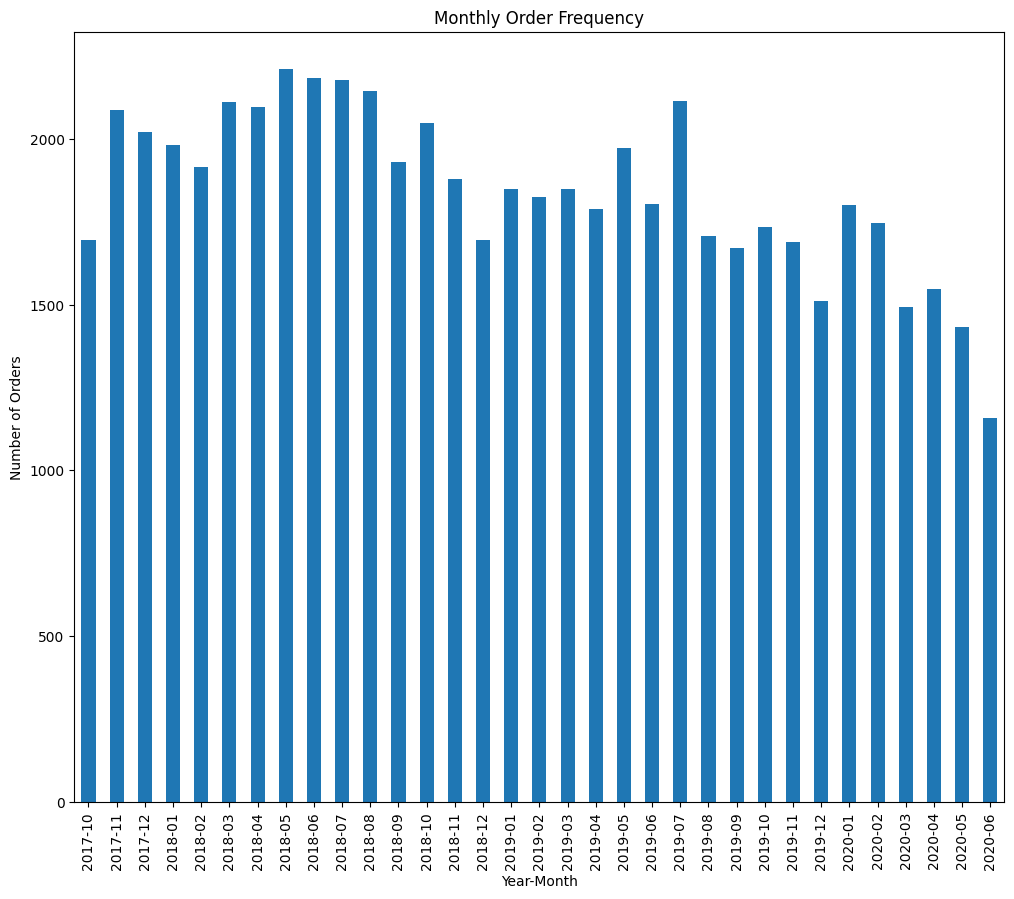

In [66]:
plt.figure(figsize=(12, 10))
monthly_orders.plot(kind='bar')
plt.title("Monthly Order Frequency")
plt.xlabel("Year-Month")
plt.ylabel("Number of Orders")
plt.show()

### number_items_ordered

In [67]:
o_mean_cost = final_merged_df['number_items_ordered'].mean()
o_median_cost = final_merged_df['number_items_ordered'].median()
o_max_cost = final_merged_df['number_items_ordered'].max()
o_min_cost = final_merged_df['number_items_ordered'].min()
o_std_dev_cost = final_merged_df['number_items_ordered'].std()

In [68]:
print("Average number of items ordered per order:", o_mean_cost)
print("Median number of items ordered per order:", o_median_cost)
print("Maximum number of items ordered per order:", o_max_cost)
print("Minimum number of items ordered per order:", o_min_cost)
print("Standard deviation of number of items ordered per order:", o_std_dev_cost)

Average number of items ordered per order: 16.367599454458812
Median number of items ordered per order: 1.0
Maximum number of items ordered per order: 10667
Minimum number of items ordered per order: 1
Standard deviation of number of items ordered per order: 111.26239046458643


### total_order_cost

In [69]:
mean_cost = final_merged_df['total_order_cost'].mean()
median_cost = final_merged_df['total_order_cost'].median()
max_cost = final_merged_df['total_order_cost'].max()
min_cost = final_merged_df['total_order_cost'].min()
std_dev_cost = final_merged_df['total_order_cost'].std()

In [70]:
print("Average order cost (in rupees):", mean_cost)
print("Median order cost (in rupees):", median_cost)
print("Maximum order cost (in rupees):", max_cost)
print("Minimum order cost (in rupees):", min_cost)
print("Standard deviation of order cost:", std_dev_cost)

Average order cost (in rupees): 6997.273247120298
Median order cost (in rupees): 565.0
Maximum order cost (in rupees): 1492435
Minimum order cost (in rupees): 5
Standard deviation of order cost: 31942.505536199402


### c_age

In [71]:
age = final_merged_df.groupby('c_age').size()

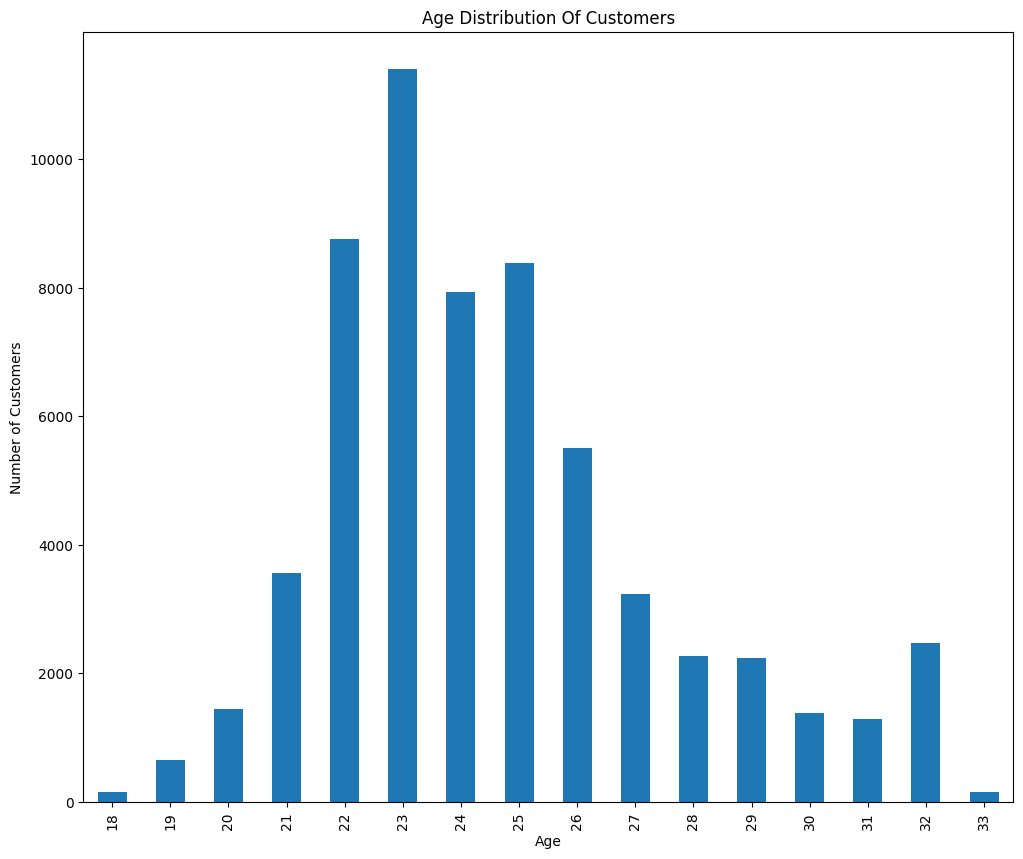

In [72]:
plt.figure(figsize=(12, 10))
age.plot(kind='bar')
plt.title("Age Distribution Of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

### c_gender

In [73]:
genders = final_merged_df.groupby('c_gender').size()

In [74]:
labels = genders.index
sizes = genders.values

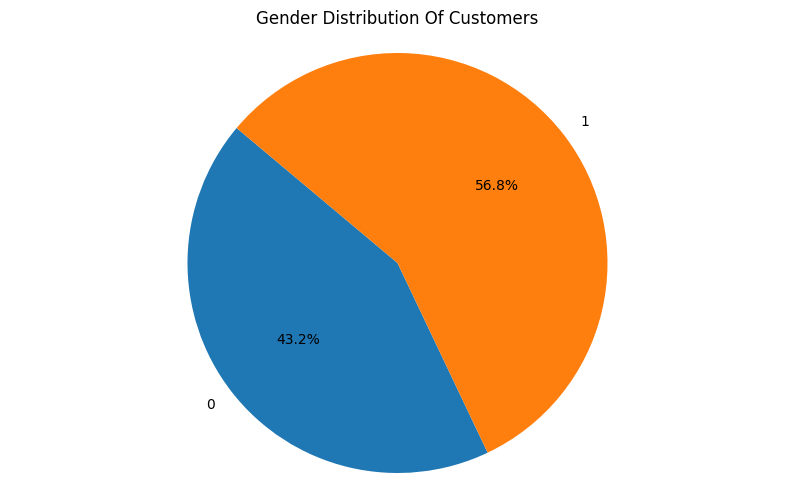

In [75]:
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution Of Customers')
plt.axis('equal')
plt.show()

### c_marital_status

In [76]:
marital = final_merged_df.groupby('c_marital_status').size()

KeyError: 'c_marital_status'

In [ ]:
labels = marital.index
sizes = marital.values

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Marital Status Of Customers')
plt.axis('equal')
plt.show()

### c_occupation

In [77]:
occupation = final_merged_df.groupby('c_occupation').size()

KeyError: 'c_occupation'

In [ ]:
labels = occupation.index
sizes = occupation.values

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Employee Occupation')
plt.axis('equal')
plt.show()

### c_education_level

In [ ]:
education = final_merged_df.groupby('c_education_level').size()

In [ ]:
labels = education.index
sizes = education.values

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Education Level Of Customers')
plt.axis('equal')
plt.show()

### c_family_size

In [ ]:
family = final_merged_df.groupby('c_family_size').size()

In [ ]:
labels = family.index
sizes = family.values

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Number Of Family Members Of Orderer Family (Including Orderer)')
plt.axis('equal')
plt.show()

### r_city

In [ ]:
city = final_merged_df.groupby('r_city').size()

In [ ]:
plt.figure(figsize=(12, 10))
city.plot(kind='bar')
plt.title("Frequency of orders per city")
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.show()

### r_rating

In [ ]:
rating = final_merged_df.groupby('r_rating').size()

In [ ]:
plt.figure(figsize=(12, 10))
rating.plot(kind='bar')
plt.title("Distribution of Restaurant Ratings Across Orders")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### r_average_per_head_cost

In [ ]:
r_mean_cost = final_merged_df['r_average_per_head_cost'].mean()
r_median_cost = final_merged_df['r_average_per_head_cost'].median()
r_max_cost = final_merged_df['r_average_per_head_cost'].max()
r_min_cost = final_merged_df['r_average_per_head_cost'].min()
r_std_dev_cost = final_merged_df['r_average_per_head_cost'].std()

In [ ]:
print("Average estimate cost per person(in rupees):", r_mean_cost)
print("Median estimate cost per person (in rupees):", r_median_cost)
print("Maximum estimate cost per person (in rupees):", r_max_cost)
print("Minimum estimate cost per person (in rupees):", r_min_cost)
print("Standard deviation of estimate cost per person:", r_std_dev_cost)

### Correlation Matrix For Numerical Non-ID Variables:

In [ ]:
final_merged_df[['number_items_ordered','total_order_cost', 'c_age','c_monthly_income','c_family_size','r_rating','r_number_of_ratings','r_average_per_head_cost']].corr()

## Data Description:

### Motivation:

#### Why was this dataset created?

This dataset was created to understand what customer level factors contribute to higher order values for delivery services. If a delivery service understand what factors would lead to higher sales and profits, then it could refocus resources and things like money spent on advertising to potentially unlock their full business potential. The inspiration comes from one of our group members past summer internship experience with a food delivery app and all of the groups passion for the country India (the dataset is based on an Indian Food Delivery Service).

#### Who funded the creation of the dataset?

While who funded the creation of these datasets is unclear, on kaggle it is mentioned that all of the data was scraped from publicly available data. Likely self funded or was just a personal project of the kaggle page's author

### Composition:

#### What do the instances that comprise the dataset represent?

If by instance you mean entry (or row), each entry represents an order made through the Zomato Delivery Platform with the accompanying restaurant and customer information.

#### Are there any errors, sources of noise, or redundancies in the dataset?

It should be noted that there are redundancies in terms of IDs, however it is ok for a restaurant id and a user id to appear multiple times in the data. This is because while every order must be unique, a person can make multiple orders and a restaurant can receive multiple orders. Orders in this case is the primary key however. The most significant error/noise appears in the distribution of restaurant ratings as there is an almost perfectly normally distributed curve with the exception of all the datapoints without ratings. Also its important to recognize that there are different sources of data in the dataset. Some are likely self-reported datapoints (like income) while order details are less biased.

#### Is the dataset self-contained, or does it link to or otherwise rely on external resources?

Our dataset ultimately is self-contained as we dropped the column containing the link to the restaurant's page.

#### What are the observations (rows) and the attributes (columns)?

- rows:
    - represents an order made through the Zomato Delivery Platform with the accompanying restaurant and customer information.
- columns:
    - 'order_id' : id associated with each order
    - 'order_date' : date in datetime format of the order
    - 'number_items_ordered' : number of items contained in the order
    - 'total_order_cost' : total cost (including taxes) of the order
    - 'currency' : currency of the total order amount
    - 'c_id' : customer id
    - 'r_id' : restaurant id
    - 'c_name': customer name
    - 'c_age' : customer age
    - 'c_gender' : customer gender
    - 'c_marital_status' : customer marital status
    - 'c_occupation' : customer occupation
    - 'c_monthly_income' : customer monthly income
    - 'c_education_level' : customer highest level of education
    - 'c_family_size' : number of members in customer's family (including customer)
    - 'r_name' : name of restaurant
    - 'r_city' : city where restaurant is located
    - 'r_rating' : rating of restaurant
    - 'r_number_of_ratings' : number of ratings for the restaurant
    - 'r_average_per_head_cost' : estimated per head cost at the restaurant
    - 'r_cuisine' : list of cuisine categories the restaurant falls into
    

### Collection Process:

#### What processes might have influenced what data was observed and recorded and what was not?

Because this comes from a pre-existing food delivery platform, the software and infrastructure designed by the platform essentially serves as a bottleneck for the type of data collected. For instance, if the platform only believes that there are two genders, they only allow for the user to input binary gender data as opposed to a more fluid/accomodating input option. There seemed to be data that was very narrow in terms of the demographics of people including gender, education level, marital status, etc.

#### Over what time frame was the data collected?

October 2017 to June 2020 (as we can see from the age distribution of customers visualization).

#### How was the data associated with each instance acquired?

Not entirely sure, however it was scraped from the internet. However there was also some somewhat sensitive data including personal names, emails, and passwords, making me think that the person scraping/creating these datasets bought data. Additionally Zomato might have poor data privacy procedures which would in fact make this type of data available for someone to scrape easily.

#### What preprocessing was done, and how did the data come to be in the form that you are using?

We basically joined the three dataframes we retrieved from the internet using orders as a primary key and restaurant and user ids as foreign keys. The data was incredibly abundant so we also dropped the few NaNs when possible, and then converted values like ranges into sequentially encoded values.

## Data Limitations

- Some data fields have fairly broad ranges that make for less meaningful data analysis. For instance for the income of the customer, they are essentially assigned a broad income bracket instead of a precise income. For this example in particular, I feel like there is a high change for bias and self-reporting.
- Some of the orders of magnitude don't align across variables. For instance comparing the total price of an entry with only one item brought might not be a valid comparison to the total price of an entry with many items brought. No standardization across fields.
- Not all geographies represnt their own city, and without knowing too much about India, it is hard to know when the input in the city column refers to a region, state, city, neighborhood, etc...
- For the number of reviews column, the values are not ranges, but lower bounds. So in theory all of the higher values should also accounted in the lower value tallies

## Questions for Reviewers

- Even though we are focused on the customer and what combo of identifiers may impact the sales price, should we still do an analysis of the restaurant variables?
- Do you think sales price is the most compelling outcome variable?
- Are there other data cleaning tasks you think we should incorporate?
- Is encoding a good strategy for when we have sequential range data?